In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Dataset
crime = pd.read_csv(r"C:\Users\krebi\OneDrive\Desktop\chicago\crime_100.csv")
crime.head(5)


,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,DATE,TIME,Day,Week,Month
0,036XX W 80 ST,1320,CRIMINAL DAMAGE,STREET,False,False,834,8,22,30.0,14,2001,41.747713,-87.712371,01-01-2001,00:00:00,Monday,1,January
1,084XX S PRAIRIE AV,1120,DECEPTIVE PRACTICE,BANK,False,False,632,6,22,30.0,10,2001,41.741163,-87.617741,01-01-2001,00:00:00,Monday,1,January
2,031XX N SEMINARY AV,841,THEFT,RESIDENCE,False,False,1932,19,22,30.0,6,2001,41.938485,-87.656344,01-01-2001,00:00:00,Monday,1,January
3,034XX W ADAMS ST,1150,DECEPTIVE PRACTICE,RESIDENCE,False,False,1123,11,28,27.0,11,2001,41.878212,-87.711432,01-01-2001,00:00:00,Monday,1,January
4,063XX S CENTRAL AV,2820,OTHER OFFENSE,OTHER,False,False,813,8,22,30.0,26,2001,41.777538,-87.761552,01-01-2001,00:00:00,Monday,1,January


In [3]:
# Binary Encoding
binary_columns = ['Arrest', 'Domestic']
le = LabelEncoder()
for col in binary_columns:
    crime[col] = le.fit_transform(crime[col])


In [4]:
crime.head(5)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,DATE,TIME,Day,Week,Month
0,036XX W 80 ST,1320,CRIMINAL DAMAGE,STREET,0,0,834,8,22,30.0,14,2001,41.747713,-87.712371,01-01-2001,00:00:00,Monday,1,January
1,084XX S PRAIRIE AV,1120,DECEPTIVE PRACTICE,BANK,0,0,632,6,22,30.0,10,2001,41.741163,-87.617741,01-01-2001,00:00:00,Monday,1,January
2,031XX N SEMINARY AV,841,THEFT,RESIDENCE,0,0,1932,19,22,30.0,6,2001,41.938485,-87.656344,01-01-2001,00:00:00,Monday,1,January
3,034XX W ADAMS ST,1150,DECEPTIVE PRACTICE,RESIDENCE,0,0,1123,11,28,27.0,11,2001,41.878212,-87.711432,01-01-2001,00:00:00,Monday,1,January
4,063XX S CENTRAL AV,2820,OTHER OFFENSE,OTHER,0,0,813,8,22,30.0,26,2001,41.777538,-87.761552,01-01-2001,00:00:00,Monday,1,January


In [12]:
# Group Rare Categories in Location Description
location_counts = crime['Location Description'].value_counts()
rare_locations = location_counts[location_counts < 10].index
crime['Location Description'] = crime['Location Description'].apply(lambda x: 'Other' if x in rare_locations else x)






'rare_locations'

In [13]:
# Count rows categorized as 'Other'
other_count = crime['Location Description'].value_counts().get('Other', 0)
print(f"Number of rows grouped into 'Other': {other_count}")


Number of rows grouped into 'Other': 184


In [16]:
a=crime[crime["Location Description"]=="other_count"]
display(a)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,DATE,TIME,Day,Week,Month


In [17]:
# Display rows where 'Location Description' is 'Other'
a = crime[crime["Location Description"] == "Other"]
display(a)


,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,DATE,TIME,Day,Week,Month
656,024XX W MONROE ST,110,HOMICIDE,Other,0,0,1125,11,2,28.0,01A,2001,41.880225,-87.688249,01-01-2001,10:40:00,Monday,1,January
48357,046XX S LAWLER AVE,110,HOMICIDE,Other,0,0,814,8,23,56.0,01A,2001,41.808871,-87.749308,09-02-2001,23:40:00,Friday,6,February
71046,054XX S ABERDEEN ST,110,HOMICIDE,Other,1,0,934,9,16,61.0,01A,2001,41.795308,-87.652480,01-03-2001,07:10:00,Thursday,9,March
130314,070XX N CLARK ST,110,HOMICIDE,Other,0,0,2424,24,49,1.0,01A,2001,42.010669,-87.674315,15-04-2001,16:05:00,Sunday,15,April
130896,028XX S CALUMET AVE,110,HOMICIDE,Other,0,0,2112,1,4,35.0,01A,2001,41.842879,-87.618792,16-04-2001,00:46:00,Monday,16,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465376,100XX W OHARE ST,460,BATTERY,Other,0,0,1651,16,41,76.0,08B,2024,41.976290,-87.905227,27-01-2024,16:05:00,Saturday,4,January
517443,006XX E GRAND AVE,870,THEFT,Other,0,0,1834,18,42,8.0,6,2024,41.891990,-87.611462,14-04-2024,03:00:00,Sunday,15,April
534169,002XX W MONTROSE HARBOR DR,1320,CRIMINAL DAMAGE,Other,0,0,1915,19,46,3.0,14,2024,41.960149,-87.637286,08-05-2024,18:00:00,Wednesday,19,May
534269,004XX N ABERDEEN ST,810,THEFT,Other,0,0,1214,12,27,24.0,6,2024,41.889185,-87.654573,08-05-2024,20:30:00,Wednesday,19,May


In [ ]:
# Ensure DATE and TIME are in datetime format
crime['DATE'] = pd.to_datetime(crime['DATE'])
crime['TIME'] = pd.to_datetime(crime['TIME'], format='%H:%M:%S').dt.time

# Extract Hour, Time of Day, and Day Type
crime['Hour'] = pd.to_datetime(crime['TIME'], format='%H:%M:%S').dt.hour
crime['Time of Day'] = pd.cut(crime['Hour'], bins=[0, 6, 12, 18, 24], 
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
crime['Is Weekend'] = crime['Day'].isin(['Saturday', 'Sunday']).astype(object)
crime['Season'] = crime['Month'].map({1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring',
                                6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall', 11:'Fall', 12:'Winter'})


In [21]:
# Identify rows where DATE conversion failed
invalid_dates = crime[pd.to_datetime(crime['DATE'], errors='coerce').isna()]
#display(invalid_dates)
invalid_dates.head(5)


,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,DATE,TIME,Day,Week,Month
14489,023XX S CHRISTIANA AV,910,MOTOR VEHICLE THEFT,PARKING LOT/GARAGE(NON.RESID.),0,0,1024,10,22,30.0,7,2001,41.848578,-87.708673,13-01-2001,00:00:00,Saturday,2,January
14490,047XX S PAULINA ST,1310,CRIMINAL DAMAGE,RESIDENCE-GARAGE,0,0,931,9,15,61.0,14,2001,41.807077,-87.667214,13-01-2001,00:00:00,Saturday,2,January
14491,007XX S STATE ST,1210,DECEPTIVE PRACTICE,RESTAURANT,0,0,132,1,34,32.0,11,2001,41.873056,-87.627419,13-01-2001,00:00:00,Saturday,2,January
14492,062XX S CALUMET AV,820,THEFT,STREET,0,0,311,3,22,30.0,6,2001,41.781434,-87.617066,13-01-2001,00:00:00,Saturday,2,January
14493,063XX S KILBOURN AV,1320,CRIMINAL DAMAGE,STREET,0,0,813,8,22,30.0,14,2001,41.777407,-87.734789,13-01-2001,00:00:00,Saturday,2,January


In [22]:
# Specify the correct format: day-month-year
crime['DATE'] = pd.to_datetime(crime['DATE'], format='%d-%m-%Y', errors='coerce')


In [23]:
# Check for any invalid dates after applying the format
invalid_dates = crime[crime['DATE'].isna()]
display(invalid_dates)


,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,DATE,TIME,Day,Week,Month


In [35]:
crime.head(50)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Longitude,DATE,TIME,Day,Week,Month,Hour,Time of Day,Is Weekend,Season
0,036XX W 80 ST,1320,CRIMINAL DAMAGE,STREET,0,0,834,8,22,30.0,...,-87.712371,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
1,084XX S PRAIRIE AV,1120,DECEPTIVE PRACTICE,BANK,0,0,632,6,22,30.0,...,-87.617741,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
2,031XX N SEMINARY AV,841,THEFT,RESIDENCE,0,0,1932,19,22,30.0,...,-87.656344,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
3,034XX W ADAMS ST,1150,DECEPTIVE PRACTICE,RESIDENCE,0,0,1123,11,28,27.0,...,-87.711432,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
4,063XX S CENTRAL AV,2820,OTHER OFFENSE,OTHER,0,0,813,8,22,30.0,...,-87.761552,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
5,032XX W EVERGREEN AVE,1753,OFFENSE INVOLVING CHILDREN,APARTMENT,0,1,1422,14,26,23.0,...,-87.707888,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
6,061XX S COTTAGE GROVE AV,820,THEFT,STREET,0,0,313,3,22,30.0,...,-87.606155,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
7,010XX N KEDVALE AV,820,THEFT,STREET,0,0,1111,11,22,30.0,...,-87.730037,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
8,121XX S RACINE AV,810,THEFT,RESIDENCE,0,0,524,5,22,30.0,...,-87.651647,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter
9,060XX S RHODES AV,820,THEFT,STREET,0,0,313,3,22,30.0,...,-87.612202,2001-01-01,00:00:00,Monday,1,January,0,Night,0,Winter


In [27]:
crime['Season'] = crime['Month'].map({'January':'Winter', 'Feburary':'Winter', 'March':'Spring', 'April':'Spring', 'May':'Spring',
                                'June':'Summer', 'July':'Summer', 'August':'Summer', 'September':'Fall', 'October':'Fall', 'November':'Fall', 'December':'Winter'})


In [30]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549434 entries, 0 to 549433
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Block                 549434 non-null  object        
 1   IUCR                  549434 non-null  object        
 2   Primary Type          549434 non-null  object        
 3   Location Description  549434 non-null  object        
 4   Arrest                549434 non-null  int64         
 5   Domestic              549434 non-null  int64         
 6   Beat                  549434 non-null  int64         
 7   District              549434 non-null  int64         
 8   Ward                  549434 non-null  int64         
 9   Community Area        549434 non-null  float64       
 10  FBI Code              549434 non-null  object        
 11  Year                  549434 non-null  int64         
 12  Latitude              549434 non-null  float64       
 13 

In [33]:
crime['Is Weekend'] = crime['Day'].isin(['Saturday', 'Sunday']).astype(int)

In [36]:
a=crime[crime["Day"]=="Sunday"]
display(a)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Longitude,DATE,TIME,Day,Week,Month,Hour,Time of Day,Is Weekend,Season
7299,054XX S ABERDEEN ST,1200,DECEPTIVE PRACTICE,RESIDENCE,1,0,934,9,15,61.0,...,-87.652331,2001-01-07,00:00:00,Sunday,1,January,0,Night,1,Winter
7300,012XX W OAKDALE AV,620,BURGLARY,RESIDENCE-GARAGE,0,0,1932,19,22,30.0,...,-87.659753,2001-01-07,00:00:00,Sunday,1,January,0,Night,1,Winter
7301,018XX N ELSTON AV,820,THEFT,STREET,0,0,1433,14,22,30.0,...,-87.666147,2001-01-07,00:00:00,Sunday,1,January,0,Night,1,Winter
7302,019XX W WARNER AV,810,THEFT,GROCERY FOOD STORE,0,0,1923,19,22,30.0,...,-87.676534,2001-01-07,00:00:00,Sunday,1,January,0,Night,1,Winter
7303,027XX W ARTHUR AV,820,THEFT,OTHER,0,0,2412,24,22,30.0,...,-87.697490,2001-01-07,00:00:00,Sunday,1,January,0,Night,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547278,011XX W CERMAK RD,1210,DECEPTIVE PRACTICE,RESTAURANT,0,0,1235,12,25,31.0,...,-87.655544,2024-05-26,23:40:00,Sunday,21,May,23,Evening,1,Spring
547279,070XX S COTTAGE GROVE AVE,2093,NARCOTICS,POLICE FACILITY / VEHICLE PARKING LOT,1,0,321,3,6,42.0,...,-87.605620,2024-05-26,23:50:00,Sunday,21,May,23,Evening,1,Spring
547280,053XX S CORNELL AVE,340,ROBBERY,APARTMENT,0,0,234,2,5,41.0,...,-87.585509,2024-05-26,23:51:00,Sunday,21,May,23,Evening,1,Spring
547281,002XX W 112TH PL,486,BATTERY,RESIDENCE,0,1,522,5,9,49.0,...,-87.628972,2024-05-26,23:57:00,Sunday,21,May,23,Evening,1,Spring


In [37]:
# Crime Frequency
crime['Crime Frequency by Beat'] = crime.groupby('Beat')['Beat'].transform('count')
crime['Crime Frequency by District'] = crime.groupby('District')['District'].transform('count')
crime.head(10)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,TIME,Day,Week,Month,Hour,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District
0,036XX W 80 ST,1320,CRIMINAL DAMAGE,STREET,0,0,834,8,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2482,35921
1,084XX S PRAIRIE AV,1120,DECEPTIVE PRACTICE,BANK,0,0,632,6,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2710,30122
2,031XX N SEMINARY AV,841,THEFT,RESIDENCE,0,0,1932,19,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,1409,26739
3,034XX W ADAMS ST,1150,DECEPTIVE PRACTICE,RESIDENCE,0,0,1123,11,28,27.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,1799,30722
4,063XX S CENTRAL AV,2820,OTHER OFFENSE,OTHER,0,0,813,8,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2899,35921
5,032XX W EVERGREEN AVE,1753,OFFENSE INVOLVING CHILDREN,APARTMENT,0,1,1422,14,26,23.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2227,23362
6,061XX S COTTAGE GROVE AV,820,THEFT,STREET,0,0,313,3,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2560,27806
7,010XX N KEDVALE AV,820,THEFT,STREET,0,0,1111,11,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2163,30722
8,121XX S RACINE AV,810,THEFT,RESIDENCE,0,0,524,5,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2374,22750
9,060XX S RHODES AV,820,THEFT,STREET,0,0,313,3,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2560,27806


In [44]:
crime_grouped = crime.groupby('District')['Crime Frequency by Beat'].value_counts().reset_index(name='Count')
display(crime_grouped)

,District,Crime Frequency by Beat,Count
0,1,2878,2878
1,1,2800,2800
2,1,2557,2557
3,1,2436,2436
4,1,2339,2339
...,...,...,...
327,25,2227,1
328,31,421,9
329,31,121,1
330,31,1236,1


In [36]:
crime.to_csv("data_pre_50.csv",index=False)

In [1]:
import pandas as pd
crime = pd.read_csv(r"C:\Users\krebi\OneDrive\Desktop\chicago\data_pre.csv")
crime.head()

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,TIME,Day,Week,Month,Hour,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District
0,036XX W 80 ST,1320,CRIMINAL DAMAGE,STREET,0,0,834,8,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2482,35921
1,084XX S PRAIRIE AV,1120,DECEPTIVE PRACTICE,BANK,0,0,632,6,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2710,30122
2,031XX N SEMINARY AV,841,THEFT,RESIDENCE,0,0,1932,19,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,1409,26739
3,034XX W ADAMS ST,1150,DECEPTIVE PRACTICE,RESIDENCE,0,0,1123,11,28,27.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,1799,30722
4,063XX S CENTRAL AV,2820,OTHER OFFENSE,OTHER,0,0,813,8,22,30.0,...,00:00:00,Monday,1,January,0,Night,0,Winter,2899,35921


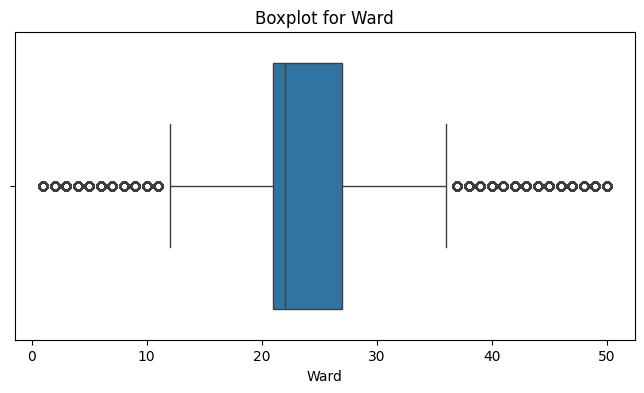

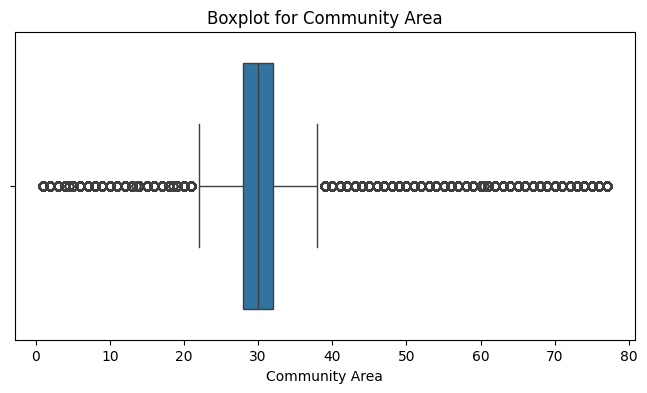

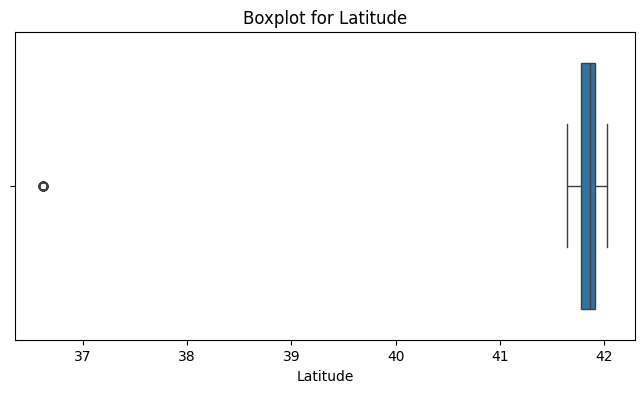

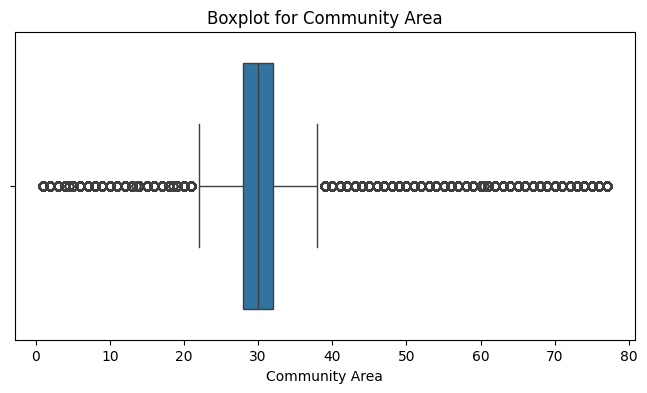

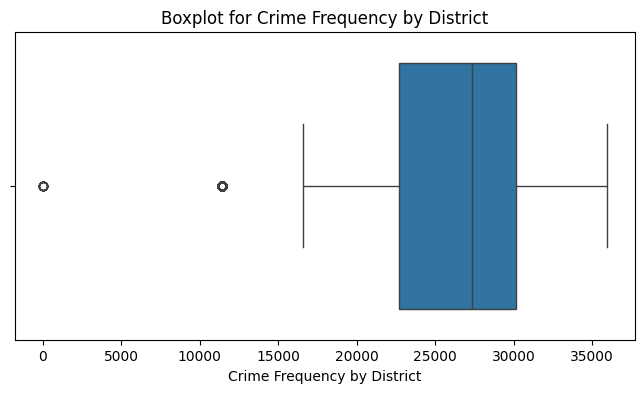

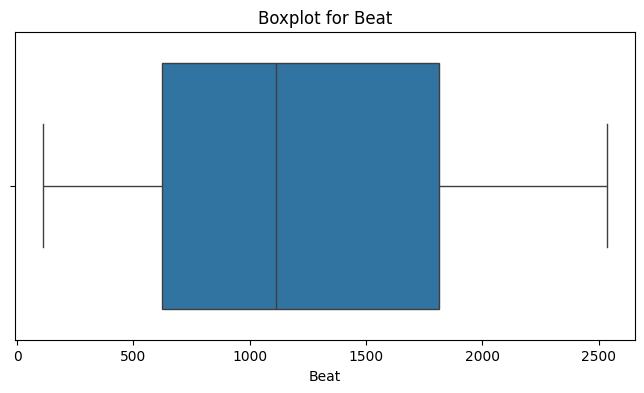

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns=["Ward","Community Area","Latitude","Community Area","Crime Frequency by District","Beat"]
# Visualize outliers in Latitude and Longitude
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=crime[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [6]:
Q1 = crime['Latitude'].quantile(0.25)
Q3 = crime['Latitude'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = crime[(crime['Latitude'] < lower_bound) | (crime['Latitude'] > upper_bound)]
display(outliers)


,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,TIME,Day,Week,Month,Hour,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District
6403,014XX N HARDING ST,110,HOMICIDE,STREET,1,0,2535,25,22,30.0,...,10:35:00,Saturday,1,January,10,Morning,1,Winter,2160,30437
96096,067XX S JEFFERY AV,110,HOMICIDE,APARTMENT,1,0,331,3,22,30.0,...,18:17:00,Tuesday,12,March,18,Evening,0,Spring,2753,27806
158010,020XX W 55 ST,110,HOMICIDE,AUTO,1,0,915,9,22,30.0,...,01:30:00,Sunday,18,May,1,Night,1,Spring,1983,26313
189433,059XX S MORGAN AV,110,HOMICIDE,Other,1,0,712,7,22,30.0,...,23:35:00,Tuesday,22,May,23,Evening,0,Spring,2450,27334
252506,030XX S HARDING ST,110,HOMICIDE,STREET,0,0,1031,10,22,30.0,...,00:34:00,Sunday,28,July,0,Night,1,Summer,2157,22688
292571,058XX S LOOMIS ST,110,HOMICIDE,VACANT LOT,1,0,713,7,22,30.0,...,13:10:00,Wednesday,35,August,13,Afternoon,0,Summer,2452,27334
296373,030XX S CALIFORNIA,110,HOMICIDE,Other,1,0,1034,10,22,30.0,...,21:00:00,Monday,36,September,21,Evening,0,Fall,2114,22688
308508,046XX S PAULINA AV,110,HOMICIDE,STREET,1,0,914,9,22,30.0,...,17:46:00,Friday,38,September,17,Afternoon,0,Fall,2175,26313
334028,015XX W PRATT AVE,110,HOMICIDE,APARTMENT,1,0,2432,24,22,30.0,...,01:30:00,Tuesday,44,October,1,Night,0,Fall,2426,18437
336889,033XX W FULTON AV `,110,HOMICIDE,VACANT LOT,0,0,1123,11,22,30.0,...,00:45:00,Sunday,45,November,0,Night,1,Fall,1799,30722


In [11]:
a=crime["District"].value_counts()
a

District
8     35921
2     35345
11    30722
25    30437
6     30122
12    30071
4     29233
3     27806
7     27334
19    26739
9     26313
18    25930
14    23362
5     22750
10    22688
1     21477
15    21135
16    18762
24    18437
22    16836
17    16589
20    11413
31       12
Name: count, dtype: int64

In [12]:
from sklearn.cluster import KMeans

# Initialize Crime Cluster Column
crime['Crime Cluster'] = -1

# Perform KMeans per District with appropriate n_clusters
for district, group in crime.groupby('District'):
    if len(group) >= 1000:  # Ensure sufficient data per district
        kmeans = KMeans(n_clusters=10, random_state=42)  # Start with 10 clusters
        cluster_labels = kmeans.fit_predict(group[['Latitude', 'Longitude']])
        crime.loc[group.index, 'Crime Cluster'] = cluster_labels
    else:
        print(f"District {district} has less than 1000 records, skipping clustering.")


District 31 has less than 1000 records, skipping clustering.


In [14]:
crime.head(50)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Day,Week,Month,Hour,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District,Crime Cluster
0,036XX W 80 ST,1320,CRIMINAL DAMAGE,STREET,0,0,834,8,22,30.0,...,Monday,1,January,0,Night,0,Winter,2482,35921,3
1,084XX S PRAIRIE AV,1120,DECEPTIVE PRACTICE,BANK,0,0,632,6,22,30.0,...,Monday,1,January,0,Night,0,Winter,2710,30122,0
2,031XX N SEMINARY AV,841,THEFT,RESIDENCE,0,0,1932,19,22,30.0,...,Monday,1,January,0,Night,0,Winter,1409,26739,9
3,034XX W ADAMS ST,1150,DECEPTIVE PRACTICE,RESIDENCE,0,0,1123,11,28,27.0,...,Monday,1,January,0,Night,0,Winter,1799,30722,6
4,063XX S CENTRAL AV,2820,OTHER OFFENSE,OTHER,0,0,813,8,22,30.0,...,Monday,1,January,0,Night,0,Winter,2899,35921,0
5,032XX W EVERGREEN AVE,1753,OFFENSE INVOLVING CHILDREN,APARTMENT,0,1,1422,14,26,23.0,...,Monday,1,January,0,Night,0,Winter,2227,23362,8
6,061XX S COTTAGE GROVE AV,820,THEFT,STREET,0,0,313,3,22,30.0,...,Monday,1,January,0,Night,0,Winter,2560,27806,9
7,010XX N KEDVALE AV,820,THEFT,STREET,0,0,1111,11,22,30.0,...,Monday,1,January,0,Night,0,Winter,2163,30722,0
8,121XX S RACINE AV,810,THEFT,RESIDENCE,0,0,524,5,22,30.0,...,Monday,1,January,0,Night,0,Winter,2374,22750,3
9,060XX S RHODES AV,820,THEFT,STREET,0,0,313,3,22,30.0,...,Monday,1,January,0,Night,0,Winter,2560,27806,3


ValueError: 'middle right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

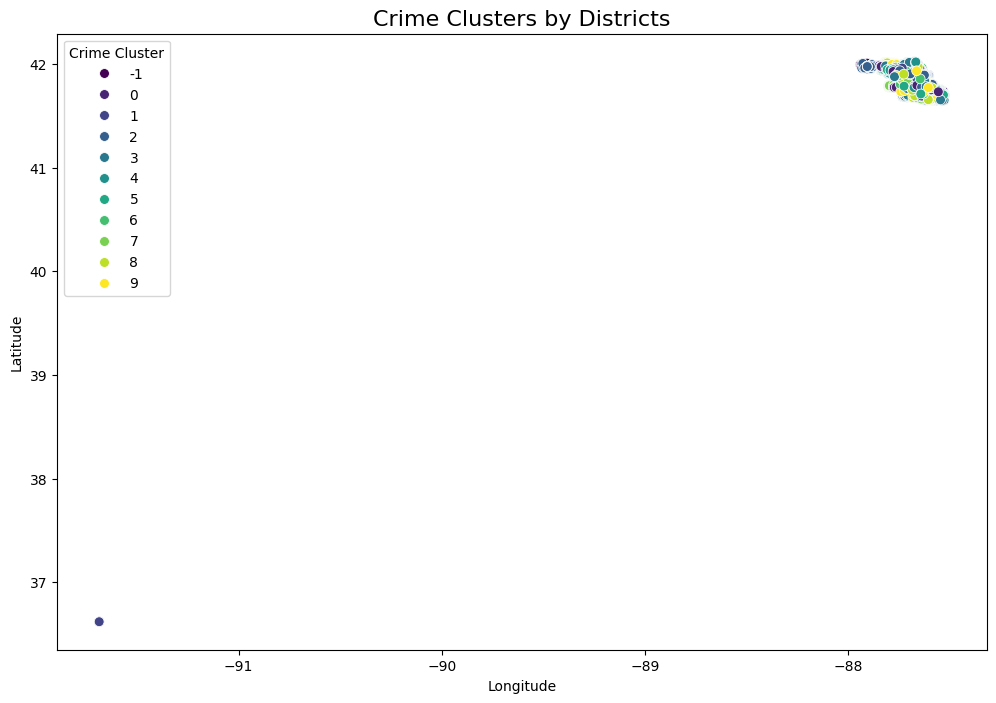

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size for better visualization
plt.figure(figsize=(12, 8))

# Scatter plot showing the districts and their crime clusters
sns.scatterplot(data=crime, x='Longitude', y='Latitude', hue='Crime Cluster', palette='viridis', legend='full', s=50)

# Optional: Add title and labels for the plot
plt.title('Crime Clusters by Districts', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.legend(title='Crime Cluster', loc='right')
plt.show()


In [22]:
!pip install shapely



   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.2 MB/s eta 0:00:00


In [23]:
!pip install geopandas


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.2 MB 1.4 MB/s eta 0:00:12
   -- ------------------------------------- 1.0/16.2 MB 1.4 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/16.2 MB 1.4 MB/s eta 0:00:11
   --- ------------------------------------ 1.6/16.2 MB 1.4 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/16.2 MB 1.5 MB/s eta 0:00:10
   ----- ---------------------------------- 2.4/16.2 MB 1.5 MB/s eta 0:00:10
   ------ --------------------------------- 2.6/16.2 MB 1.5 MB/s eta 0:00:10
   ------ --------------------------------- 2.6/16.2 MB 1.5 MB/s eta 0:00:10
   ------- -------------------------------- 2.9/16.2 MB 1.3 MB/s eta 0:00:11
   ------- -------------------------------- 3.1/16.2 MB 1.3 MB/s eta 0:00:11
   ------- ---------

In [33]:
crime.tail(10)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Day,Week,Month,Hour,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District,Crime Cluster
549424,132XX S BURLEY AVE,560,ASSAULT,SCHOOL - PUBLIC BUILDING,0,0,433,4,10,55.0,...,Thursday,22,May,0,Night,0,Spring,1789,29233,3
549425,061XX S DR MARTIN LUTHER KING JR DR,1320,CRIMINAL DAMAGE,SIDEWALK,0,1,313,3,20,42.0,...,Thursday,22,May,0,Night,0,Spring,2560,27806,3
549426,026XX W EVERGREEN AVE,281,CRIMINAL SEXUAL ASSAULT,RESIDENCE,0,0,1423,14,26,24.0,...,Thursday,22,May,0,Night,0,Spring,2220,23362,2
549427,089XX S MUSKEGON AVE,930,MOTOR VEHICLE THEFT,STREET,0,0,423,4,10,46.0,...,Thursday,22,May,0,Night,0,Spring,3728,29233,0
549428,001XX S MAYFIELD AVE,820,THEFT,RESIDENCE - YARD (FRONT / BACK),0,0,1513,15,29,25.0,...,Thursday,22,May,0,Night,0,Spring,1638,21135,3
549429,100XX S EMERALD AVE,610,BURGLARY,RESIDENCE,0,0,2232,22,21,73.0,...,Thursday,22,May,0,Night,0,Spring,1726,16836,5
549430,039XX W DIVISION ST,560,ASSAULT,GAS STATION,1,0,2535,25,37,23.0,...,Thursday,22,May,0,Night,0,Spring,2160,30437,8
549431,018XX S UNION AVE,910,MOTOR VEHICLE THEFT,STREET,0,0,1235,12,25,31.0,...,Thursday,22,May,0,Night,0,Spring,844,30071,6
549432,066XX S MARYLAND AVE,1153,DECEPTIVE PRACTICE,APARTMENT,0,0,321,3,20,42.0,...,Thursday,22,May,0,Night,0,Spring,3090,27806,9
549433,029XX N LINCOLN AVE,610,BURGLARY,SMALL RETAIL STORE,0,0,1933,19,32,6.0,...,Thursday,22,May,0,Night,0,Spring,1717,26739,9


In [34]:
crime.drop(columns=['Hour'], inplace=True)

In [35]:
crime.head()

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,TIME,Day,Week,Month,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District,Crime Cluster
0,036XX W 80 ST,1320,CRIMINAL DAMAGE,STREET,0,0,834,8,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,2482,35921,3
1,084XX S PRAIRIE AV,1120,DECEPTIVE PRACTICE,BANK,0,0,632,6,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,2710,30122,0
2,031XX N SEMINARY AV,841,THEFT,RESIDENCE,0,0,1932,19,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,1409,26739,9
3,034XX W ADAMS ST,1150,DECEPTIVE PRACTICE,RESIDENCE,0,0,1123,11,28,27.0,...,00:00:00,Monday,1,January,Night,0,Winter,1799,30722,6
4,063XX S CENTRAL AV,2820,OTHER OFFENSE,OTHER,0,0,813,8,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,2899,35921,0


In [1]:
import pandas as pd
crime=pd.read_csv(r"C:\Users\krebi\OneDrive\Desktop\chicago\data_pre_50.csv")
crime.head()

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,TIME,Day,Week,Month,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District,Crime Cluster
0,036XX W 80 ST,1320,CRIMINAL DAMAGE,STREET,0,0,834,8,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,2482,35921,3
1,084XX S PRAIRIE AV,1120,DECEPTIVE PRACTICE,BANK,0,0,632,6,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,2710,30122,0
2,031XX N SEMINARY AV,841,THEFT,RESIDENCE,0,0,1932,19,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,1409,26739,9
3,034XX W ADAMS ST,1150,DECEPTIVE PRACTICE,RESIDENCE,0,0,1123,11,28,27.0,...,00:00:00,Monday,1,January,Night,0,Winter,1799,30722,6
4,063XX S CENTRAL AV,2820,OTHER OFFENSE,OTHER,0,0,813,8,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,2899,35921,0


<Axes: title={'center': 'Top 10 Crime Types'}, xlabel='IUCR'>

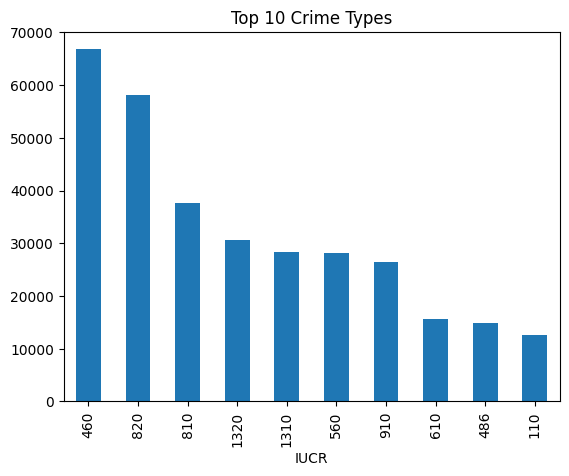

In [2]:
# Top 10 crime types
# crime['Primary Type'].value_counts().head(10).plot(kind='bar', title='Top 10 Crime Types')
crime['IUCR'].value_counts().head(10).plot(kind='bar', title='Top 10 Crime Types')




In [30]:
crime[crime['IUCR']=='910']

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,TIME,Day,Week,Month,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District,Crime Cluster
52,052XX S FRANCISCO AV,910,MOTOR VEHICLE THEFT,STREET,0,0,911,9,22,30.0,...,00:01:00,Monday,1,January,Night,0,Winter,1615,26313,8
68,049XX N HARDING AV,910,MOTOR VEHICLE THEFT,STREET,0,0,1712,17,22,30.0,...,00:01:00,Monday,1,January,Night,0,Winter,2273,16589,1
77,011XX W CATALPA AV,910,MOTOR VEHICLE THEFT,STREET,0,0,2023,20,22,30.0,...,00:01:00,Monday,1,January,Night,0,Winter,1231,11413,0
82,047XX N WASHTENAW AV,910,MOTOR VEHICLE THEFT,STREET,0,0,1911,19,22,30.0,...,00:01:00,Monday,1,January,Night,0,Winter,1363,26739,3
92,034XX W CARROLL AV,910,MOTOR VEHICLE THEFT,STREET,0,0,1123,11,22,30.0,...,00:05:00,Monday,1,January,Night,0,Winter,1799,30722,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549399,081XX S SAGINAW AVE,910,MOTOR VEHICLE THEFT,STREET,0,0,422,4,7,46.0,...,23:05:00,Wednesday,22,May,Evening,0,Spring,1961,29233,4
549402,080XX S WESTERN AVE,910,MOTOR VEHICLE THEFT,STREET,0,0,835,8,18,70.0,...,23:15:00,Wednesday,22,May,Evening,0,Spring,2494,35921,8
549406,014XX W 15TH ST,910,MOTOR VEHICLE THEFT,STREET,0,0,1233,12,28,28.0,...,23:30:00,Wednesday,22,May,Evening,0,Spring,1606,30071,2
549423,005XX W 64TH ST,910,MOTOR VEHICLE THEFT,STREET,0,0,722,7,6,68.0,...,00:00:00,Thursday,22,May,Night,0,Spring,1676,27334,2


In [31]:
a=crime[crime["Arrest"]==1].count()
a

Block                          130388
IUCR                           130388
Primary Type                   130388
Location Description           130388
Arrest                         130388
Domestic                       130388
Beat                           130388
District                       130388
Ward                           130388
Community Area                 130388
FBI Code                       130388
Year                           130388
Latitude                       130388
Longitude                      130388
DATE                           130388
TIME                           130388
Day                            130388
Week                           130388
Month                          130388
Time of Day                    130388
Is Weekend                     130388
Season                         116301
Crime Frequency by Beat        130388
Crime Frequency by District    130388
Crime Cluster                  130388
dtype: int64

In [20]:
a=crime.groupby("Season").count()
display(a)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,DATE,TIME,Day,Week,Month,Time of Day,Is Weekend,Crime Frequency by Beat,Crime Frequency by District,Crime Cluster
Season,,,,,,,,,,,,,,,,,,,,,
Fall,111679,111679,111679,111679,111679,111679,111679,111679,111679,111679,...,111679,111679,111679,111679,111679,111679,111679,111679,111679,111679
Spring,188462,188462,188462,188462,188462,188462,188462,188462,188462,188462,...,188462,188462,188462,188462,188462,188462,188462,188462,188462,188462
Summer,111037,111037,111037,111037,111037,111037,111037,111037,111037,111037,...,111037,111037,111037,111037,111037,111037,111037,111037,111037,111037
Winter,83507,83507,83507,83507,83507,83507,83507,83507,83507,83507,...,83507,83507,83507,83507,83507,83507,83507,83507,83507,83507


<Axes: title={'center': 'Arrest Distribution'}, ylabel='count'>

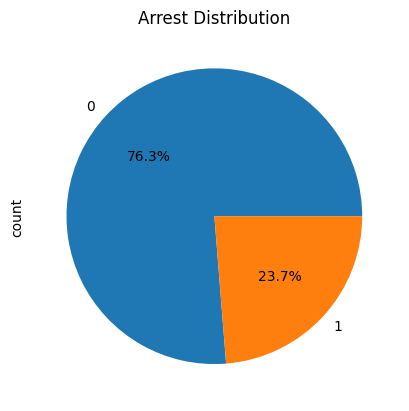

In [4]:
# Arrests distribution
crime['Arrest'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Arrest Distribution')

<Axes: title={'center': 'Domestic Distribution'}, ylabel='count'>

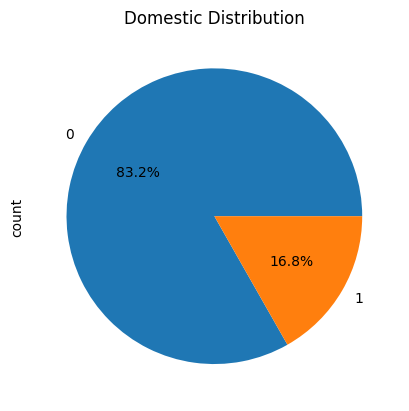

In [6]:
# Arrests distribution
crime['Domestic'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Domestic Distribution')

<Axes: title={'center': 'Top 10 Beats by Crime Frequency'}, xlabel='Beat'>

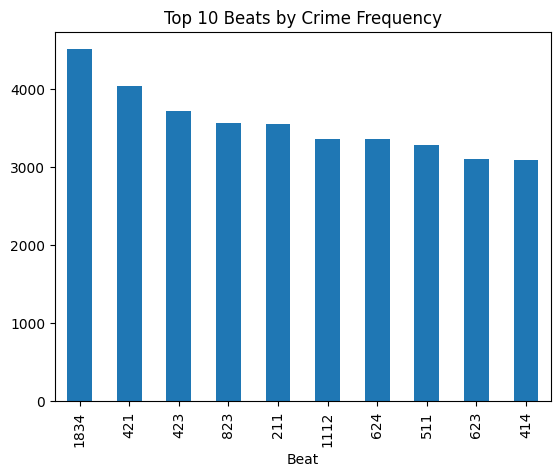

In [7]:
# Crime frequency by Beat
crime['Beat'].value_counts().head(10).plot(kind='bar', title='Top 10 Beats by Crime Frequency')


In [5]:
crime[crime['IUCR']=='460']

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,TIME,Day,Week,Month,Time of Day,Is Weekend,Season,Crime Frequency by Beat,Crime Frequency by District,Crime Cluster
14,078XX S ESSEX AV,460,BATTERY,RESIDENCE,0,0,421,4,22,30.0,...,00:00:00,Monday,1,January,Night,0,Winter,4043,29233,8
54,023XX S STATE ST,460,BATTERY,CHA HALLWAY/STAIRWELL/ELEVATOR,0,1,2113,2,3,33.0,...,00:01:00,Monday,1,January,Night,0,Winter,2086,35345,5
99,020XX W 69 ST,460,BATTERY,RESIDENCE PORCH/HALLWAY,0,1,735,7,22,30.0,...,00:05:00,Monday,1,January,Night,0,Winter,1772,27334,4
103,016XX S CENTRAL PARK AV,460,BATTERY,RESIDENCE,0,1,1021,10,22,30.0,...,00:10:00,Monday,1,January,Night,0,Winter,2391,22688,4
113,020XX W 17 ST,460,BATTERY,SIDEWALK,0,0,1223,12,22,30.0,...,00:20:00,Monday,1,January,Night,0,Winter,2004,30071,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549311,015XX N DAMEN AVE,460,BATTERY,CTA TRAIN,0,0,1424,14,1,24.0,...,20:40:00,Wednesday,22,May,Evening,0,Spring,2158,23362,4
549332,033XX N NORMANDY AVE,460,BATTERY,STREET,0,0,1632,16,38,17.0,...,21:11:00,Wednesday,22,May,Evening,0,Spring,1374,18762,4
549346,027XX W NORTH SHORE AVE,460,BATTERY,APARTMENT,0,1,2412,24,50,2.0,...,21:31:00,Wednesday,22,May,Evening,0,Spring,1872,18437,6
549349,003XX E 51ST ST,460,BATTERY,CTA TRAIN,0,0,231,2,3,40.0,...,21:41:00,Wednesday,22,May,Evening,0,Spring,1555,35345,6


In [10]:
crime_location = crime.groupby(['Primary Type', 'Location Description']).size().reset_index(name='Count')
crime_location.sort_values(by='Count', ascending=False).head(20)


,Primary Type,Location Description,Count
2013,THEFT,STREET,31125
1214,MOTOR VEHICLE THEFT,STREET,27946
582,CRIMINAL DAMAGE,STREET,23486
277,BATTERY,RESIDENCE,23135
297,BATTERY,STREET,21673
199,BATTERY,APARTMENT,18080
1312,NARCOTICS,STREET,17843
1493,OTHER OFFENSE,RESIDENCE,14609
562,CRIMINAL DAMAGE,RESIDENCE,10874
1993,THEFT,RESIDENCE,10873


<Axes: title={'center': 'Top Crimes Leading to Arrests'}, xlabel='Primary Type'>

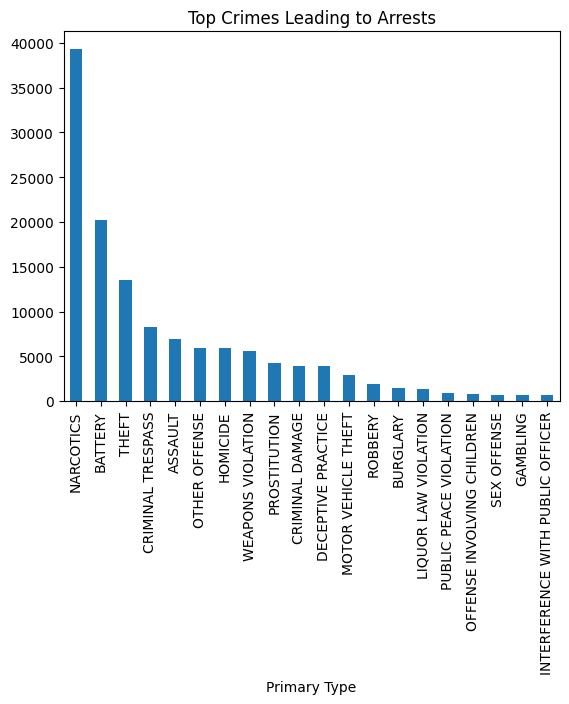

In [12]:
arrest_crime = crime[crime['Arrest'] == 1]['Primary Type'].value_counts().head(20)
arrest_crime.plot(kind='bar', title='Top Crimes Leading to Arrests')


In [18]:
crime_time= crime.groupby([ 'Month','Year'==2012]).size().reset_index(name='Count')
crime_time.sort_values(by='Count', ascending=False).head(20)


KeyboardInterrupt

